<a href="https://colab.research.google.com/github/3203917586/Back/blob/master/LogisticRegression_Diabetes_Prediction_CUT_OFF_CUN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# ***Regresion Logística - Definición del Cut-Off:***

El desempeño de cualquier modelo en un problema de clasificación se evalúa mediante una matriz de confusión. Los elementos de la matriz de confusión se utilizan para encontrar tres parámetros importantes denominados precisión, sensibilidad y especificidad. La predicción de clases para los datos en un problema de clasificación se basa en encontrar el límite óptimo entre clases. Según los valores de precisión, sensibilidad y especificidad, se puede encontrar el límite óptimo.

In [ ]:
# Cargando las Librerías requeridas:

import pandas as pd
import numpy as np

In [ ]:
# Importando la data (diabetes(1).csv):

dib = pd.read_csv('diabetes.csv', sep=';')

In [ ]:
# Dimesión del dataframe
dib.shape

(695, 9)

In [ ]:
dib.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,"33,6","0,627",50,1
1,1,85,66,29,0,"26,6","0,351",31,0
2,8,183,64,0,0,"23,3","0,672",32,1
3,1,89,66,23,94,"28,1","0,167",21,0
4,0,137,40,35,168,"43,1","2,288",33,1


In [ ]:
# Una manera de convertir Yes en 1, y No en 0:
# dib['Diabetes'] = dib['Diabetes'].map({'Yes': 1, 'No': 0})

# Laa base ya tiene clasificados los casos de Diabetes como 0, 1, en la columna Outcome
dib['Diabetes'] = dib['Outcome']


In [ ]:
dib.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Diabetes
0,6,148,72,35,0,"33,6","0,627",50,1,1
1,1,85,66,29,0,"26,6","0,351",31,0,0
2,8,183,64,0,0,"23,3","0,672",32,1,1
3,1,89,66,23,94,"28,1","0,167",21,0,0
4,0,137,40,35,168,"43,1","2,288",33,1,1


In [ ]:
# Poner las variables de características y/o atributos en X:
X = dib['Glucose'] # Nivel de azucar

# Poner la variable de respuesta o de salida, en y
y = dib['Diabetes']

In [ ]:
X.shape

(695,)

In [ ]:
X.head()

,Glucose
0,148
1,85
2,183
3,89
4,137


In [ ]:
y.head()

,Diabetes
0,1
1,0
2,1
3,0
4,1


In [ ]:
# Dividir los datos en Train y Test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
y_train.head()

,Diabetes
268,0
162,0
687,1
253,0
511,1


In [ ]:
y_train.shape

(486,)

In [ ]:
# Para estandarizar las variables independientes de trabajo:
#
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# X_train = scaler.fit_transform(X_train)

# X_train.head()

In [ ]:
import statsmodels.api as sm

In [ ]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Diabetes   No. Observations:                  486
Model:                            GLM   Df Residuals:                      484
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -255.31
Date:                Wed, 06 Nov 2024   Deviance:                       510.62
Time:                        01:24:40   Pearson chi2:                     671.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2103
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.3390      0.532    -10.040      0.000      -6.381      -4.297
Glucose        0.0374      0.004      9.164      0.000       0.029       0.045
==============================================================================
"""

El modelo Logit para este caso, quedaría de la siguiente manera:


$$P(y|x) = \frac{e^{-5.3390 + 0.0374*Glucose}}{1 + e^{-5.3390 + 0.0374*Glucose}}$$


Y la evaluación de todos los sujetos en este modelo, que es la predicción del modelo, es:

In [ ]:
y_train_pred = res.predict(X_train_sm)

# Una mirada a las primeras 20 predicciones:
y_train_pred.head(20)

,0
268,0.346949
162,0.103032
687,0.733232
253,0.408299
511,0.338535
450,0.117682
510,0.183680
136,0.201081
544,0.330221
581,0.710748


In [ ]:
#dib_train = pd.DataFrame()

In [ ]:
#dib_train['y_train_pred'] = y_train_pred

In [ ]:
#dib_train['Blood Sugar Level'] = X_train

In [ ]:
#dib_train['Diabetes'] = y_train

In [ ]:
#dib_train['Blood Sugar Level','Diabetes','y_train_pred'] = (X_train, y_train, y_train_pred, axis =1)

In [ ]:
# Creando una tabla de resultados de la ejecución del modelo en la muestra de entrenamiento:

data = {'Glucose':X_train, 'Diabetes':y_train, 'y_train_pred':y_train_pred}
dib_train = pd.DataFrame(data)

In [ ]:
dib_train.head()

,Glucose,Diabetes,y_train_pred
268,126,0,0.346949
162,85,0,0.103032
687,170,1,0.733232
253,133,0,0.408299
511,125,1,0.338535


In [ ]:
# A partir de las propensiones, creamos una variable de clasificación (Diabetes: 0, 1), con punto de corte en 50%:

dib_train['Diabetes_predicted'] = dib_train.y_train_pred.map(lambda x: 1 if x > 0.5 else 0)

# Una mirada rápida a la nueva base:
dib_train.head()

,Glucose,Diabetes,y_train_pred,Diabetes_predicted
268,126,0,0.346949,0
162,85,0,0.103032,0
687,170,1,0.733232,1
253,133,0,0.408299,0
511,125,1,0.338535,0


Requerimos cargar un paquete adicional para calcular métricas que ayuden a evaluar la calidad del modelo ajustado.

In [ ]:
from sklearn import metrics

In [ ]:
# Matriz de Confusión:

from sklearn import metrics
confusion = metrics.confusion_matrix(dib_train.Diabetes, dib_train.Diabetes_predicted)
print(confusion)

[[287  32]
 [ 84  83]]


Text(0.5, 427.9555555555555, 'Niveles Predecidos')

<Figure size 500x200 with 0 Axes>

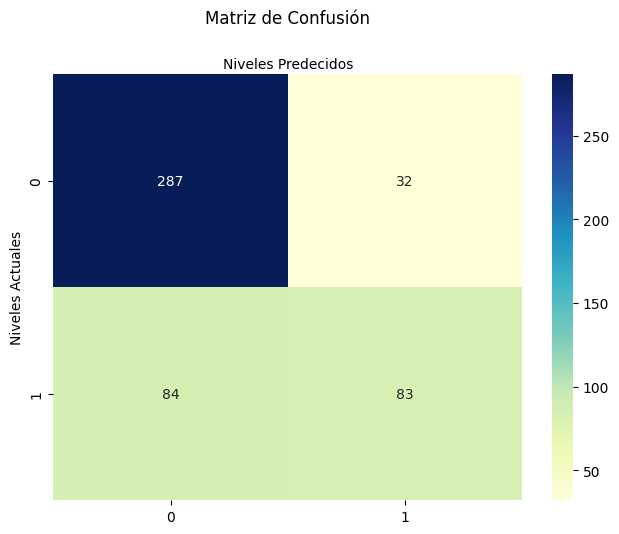

In [ ]:
# Visualizando la matriz de confusión usando Heatmap:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


cnf_matrix = metrics.confusion_matrix(dib_train.Diabetes, dib_train.Diabetes_predicted)
# cnf_matrix



# import required modules
plt.figure(figsize=(5,2))
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Niveles Actuales')
plt.xlabel('Niveles Predecidos')



In [ ]:
# Comprobamos el Accuracy, que es la Precisión General del Modelo:

print(round(metrics.accuracy_score(dib_train.Diabetes, dib_train.Diabetes_predicted), 3))

0.761


De donde sale el Accuracy?, sale del siguiente cálculo:

$$Accuracy = \frac{287 + 83}{287 + 83+ 84 + 32} = 0.761$$

In [ ]:
# Creamos columnas con diferentes límites de Cut-Off:

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    dib_train[i]= dib_train.y_train_pred.map(lambda x: 1 if x > i else 0)
dib_train.head()

,Glucose,Diabetes,y_train_pred,Diabetes_predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
268,126,0,0.346949,0,1,1,1,1,0,0,0,0,0,0
162,85,0,0.103032,0,1,1,0,0,0,0,0,0,0,0
687,170,1,0.733232,1,1,1,1,1,1,1,1,1,0,0
253,133,0,0.408299,0,1,1,1,1,1,0,0,0,0,0
511,125,1,0.338535,0,1,1,1,1,0,0,0,0,0,0


Ahora calculemos la sensibilidad y especificidad de la precisión para varios límites de Cut-Off, a partir de la matriz de confusión:


Matriz_Confusion:



$$ConfusionMatrix:
\begin{bmatrix}
TN & FP\\
FN & TP
\end{bmatrix}
$$


- TP = confusion[1,1] # Verdaderos Positivos
- TN = confusion[0,0] # Verdaderos Negativos
- FP = confusion[0,1] # Falsos Positivos
- FN = confusion[1,0] # False Negativos

.


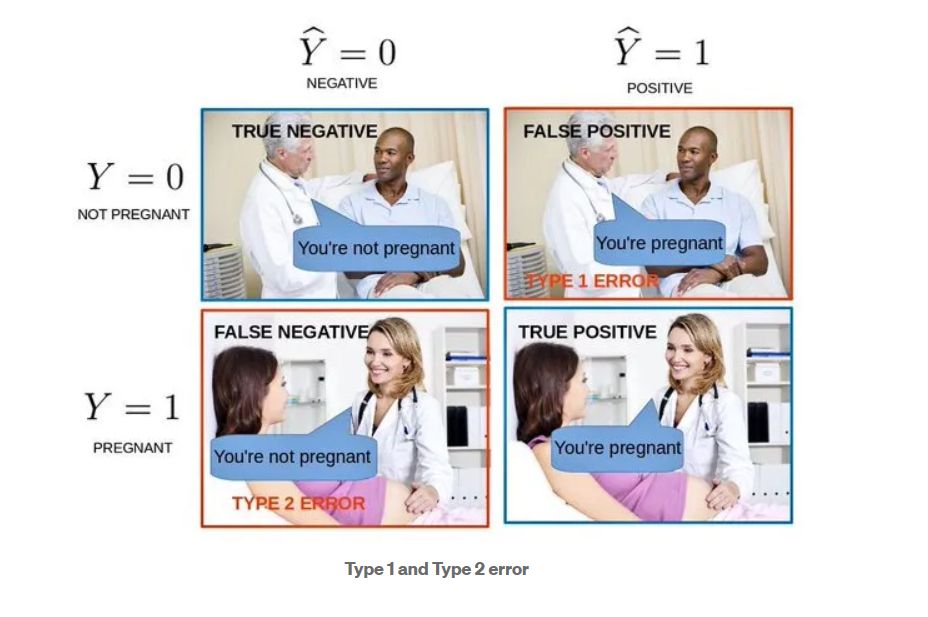

In [ ]:
# Ahora calculemos la sensibilidad y especificidad de la precisión para varios límites de Cut-Off:

cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(dib_train.Diabetes, dib_train[i])
    total1=sum(sum(cm1))
    Accuracy = (cm1[0,0]+cm1[1,1])/total1

    Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,Accuracy,Sensitivity,Specificity]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.343621     1.000000     0.000000
0.1          0.1  0.417695     0.976048     0.125392
0.2          0.2  0.592593     0.886228     0.438871
0.3          0.3  0.689300     0.730539     0.667712
0.4          0.4  0.748971     0.592814     0.830721
0.5          0.5  0.761317     0.497006     0.899687
0.6          0.6  0.748971     0.383234     0.940439
0.7          0.7  0.736626     0.281437     0.974922
0.8          0.8  0.691358     0.131737     0.984326
0.9          0.9  0.656379     0.000000     1.000000


A través de este modelamiento, se pueden graficar las curvas de Sensibilidad y Especificidad, tal como se aprecia a continuación.

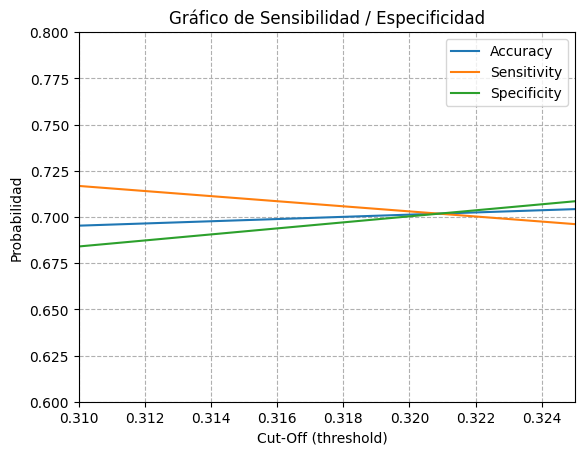

In [ ]:

# Graficamos la precisión, la sensibilidad y la especificidad para varias probabilidades.

Grilla_X = np.linspace(0,1,20,endpoint=False)

import matplotlib.pyplot as plt
#cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity']).grid( which='major', color='r' , linestyle='--')
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity']).grid( which='major', linestyle='--')

plt.title('Gráfico de Sensibilidad / Especificidad')
plt.xlabel('Cut-Off (threshold)  ')
plt.ylabel('Probabilidad')

plt.ylim([0.6, 0.8])
plt.xlim([0.31, 0.325])


plt.show()

Threshold = 0.321

In [ ]:
dib_train['Diabetes_predicted'] = dib_train.y_train_pred.map(lambda x: 1 if x > 0.321 else 0)

# Una mirada a la base:
dib_train.head(10)

,Glucose,Diabetes,y_train_pred,Diabetes_predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
268,126,0,0.346949,1,1,1,1,1,0,0,0,0,0,0
162,85,0,0.103032,0,1,1,0,0,0,0,0,0,0,0
687,170,1,0.733232,1,1,1,1,1,1,1,1,1,0,0
253,133,0,0.408299,1,1,1,1,1,1,0,0,0,0,0
511,125,1,0.338535,1,1,1,1,1,0,0,0,0,0,0
450,89,0,0.117682,0,1,1,0,0,0,0,0,0,0,0
510,103,0,0.183680,0,1,1,0,0,0,0,0,0,0,0
136,106,0,0.201081,0,1,1,1,0,0,0,0,0,0,0
544,124,0,0.330221,1,1,1,1,1,0,0,0,0,0,0
581,167,1,0.710748,1,1,1,1,1,1,1,1,1,0,0


In [ ]:
# Comprobemos el Accuracy general:

print(round(metrics.accuracy_score(dib_train.Diabetes, dib_train.Diabetes_predicted), 3))

0.702


In [ ]:
# Matriz de confusión - Nueva
confusion_train = metrics.confusion_matrix(dib_train.Diabetes, dib_train.Diabetes_predicted)
print(confusion_train)

[[223  96]
 [ 49 118]]


Text(0.5, 427.9555555555555, 'Niveles Predecidos')

<Figure size 500x200 with 0 Axes>

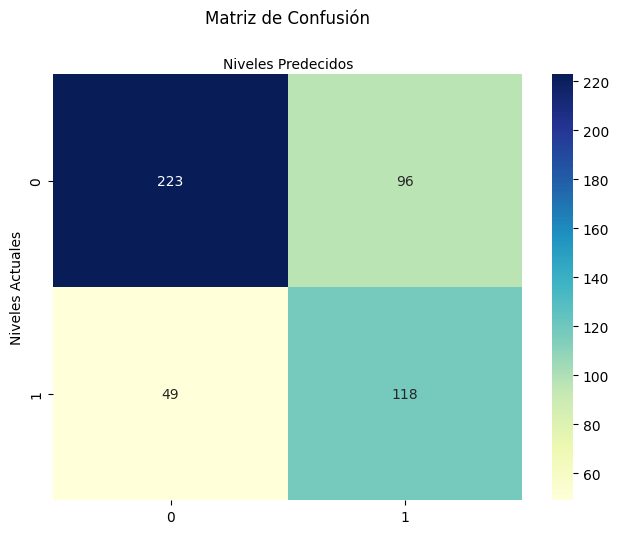

In [ ]:
# Visualizando la matriz de confusión usando Heatmap:

from sklearn import metrics

cnf_matrix = confusion_train
# cnf_matrix


# import required modules
plt.figure(figsize=(5,2))
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Niveles Actuales')
plt.xlabel('Niveles Predecidos')


In [ ]:
TP = confusion_train[1,1] # true positive
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

In [ ]:
# Veamos la sensibilidad de nuestro modelo de regresión logística:

round(TP / float(TP+FN), 3)

0.707

In [ ]:
# Let us calculate specificity
round(TN / float(TN+FP))

1

****************************************************
Ahora construímos el Dataframe de Validación (Test):
****************************************************

In [ ]:
X_test_sm = sm.add_constant(X_test)

In [ ]:
y_test_pred = res.predict(X_test_sm)

In [ ]:
dib_test = pd.DataFrame()

In [ ]:
dib_test['y_test_pred'] = y_test_pred

In [ ]:
dib_test['Glucose'] = X_test

In [ ]:
dib_test['Diabetes'] = y_test

In [ ]:
dib_test.head()

,y_test_pred,Glucose,Diabetes
109,0.162325,99,0
470,0.162325,99,0
207,0.417353,134,1
133,0.601909,154,0
106,0.528617,146,1


In [ ]:
dib_test['Diabetes_predicted'] = dib_test.y_test_pred.map(lambda x: 1 if x > 0.32 else 0)


dib_test.head()

,y_test_pred,Glucose,Diabetes,Diabetes_predicted
109,0.162325,99,0,0
470,0.162325,99,0,0
207,0.417353,134,1,1
133,0.601909,154,0,1
106,0.528617,146,1,1


In [ ]:
# Matriz de confusión para TEST:

confusion_test = metrics.confusion_matrix(dib_test.Diabetes, dib_test.Diabetes_predicted)
print(confusion_test)

[[99 30]
 [22 58]]


Text(0.5, 427.9555555555555, 'Niveles Predecidos')

<Figure size 500x200 with 0 Axes>

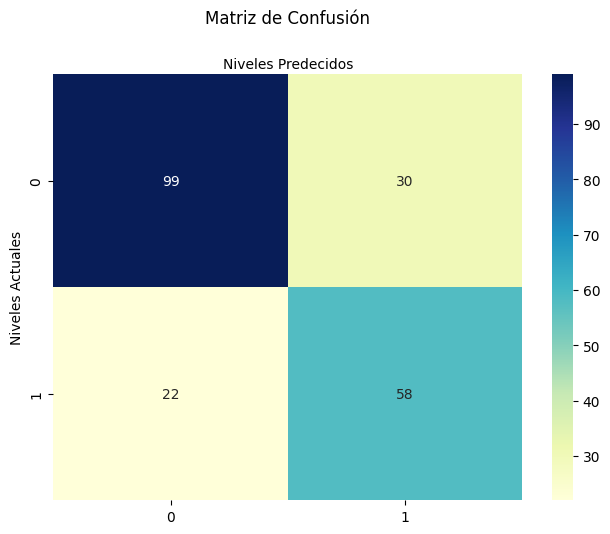

In [ ]:
# Visualizando la matriz de confusión usando Heatmap:

from sklearn import metrics

cnf_matrix = confusion_test
# cnf_matrix


# import required modules
plt.figure(figsize=(5,2))
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Niveles Actuales')
plt.xlabel('Niveles Predecidos')

In [ ]:
# Comprobando el Accuracy general, en el Test:

print(round(metrics.accuracy_score(dib_test.Diabetes, dib_test.Diabetes_predicted),3))

0.751


el Accuracy para Test, es:

$$Accuracy = \frac{99 + 58}{99 + 58 + 22 + 30} = 0.751 $$

In [ ]:
TP = confusion_test[1,1] # true positive
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [ ]:
# Veamos la sensibilidad de nuestro modelo de regresión logística (en TEST)
round(TP / float(TP+FN), 3)

0.725

In [ ]:
# Calculemos la especificidad:
round(TN / float(TN+FP), 3)

0.767

********************************************

Estadísticas Automáticas:

********************************************


Calcular precisión, recuperación (sensibilidad), F1-Score y el Soporte

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(dib_test.Diabetes, dib_test.Diabetes_predicted))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       129
           1       0.66      0.72      0.69        80

    accuracy                           0.75       209
   macro avg       0.74      0.75      0.74       209
weighted avg       0.76      0.75      0.75       209



In [ ]:
dib_test

,y_test_pred,Glucose,Diabetes,Diabetes_predicted
109,0.162325,99,0,0
470,0.162325,99,0,0
207,0.417353,134,1,1
133,0.601909,154,0,1
106,0.528617,146,1,1
...,...,...,...,...
457,0.275148,117,0,0
447,0.162325,99,0,0
609,0.305924,121,1,0
684,0.201081,106,0,0


In [ ]:
## ROC Curva Caracerística de Operación:


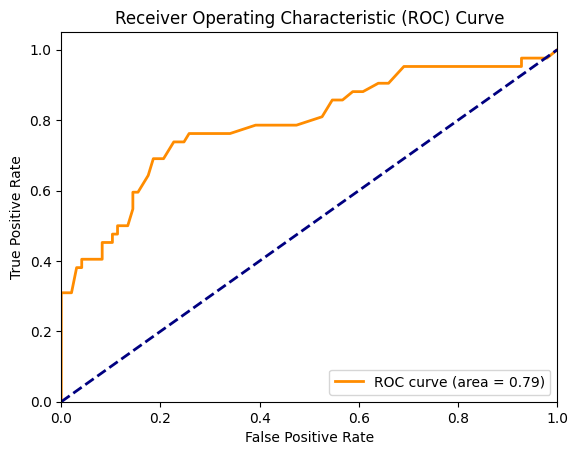

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # Example model, choose as needed
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have your features in 'X' and target variable in 'y'
# ... (Your code to load and prepare data) ...

# Split data into training and testing sets
# Reshape X to be a 2D array using reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1, 1), y, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed

# Create and train the model
model = LogisticRegression() # Replace with your desired model
model.fit(X_train, y_train)

# Predecir las probabilidades en el conjunto de prueba
# Reshape X_test to be a 2D array using reshape(-1, 1)
y_scores = model.predict_proba(X_test.reshape(-1, 1))[:, 1]

# Calcular los puntos para la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calcular el AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()